<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/supervised-ml/DesecionTree_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
"""
Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness.
The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients,
and the target is the drug that each patient responded to.
It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, 
and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
"""
#Downloading the Data
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv


--2020-02-09 13:28:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-02-09 13:28:59 (655 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [4]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
print(my_data.shape)

my_data.tail()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
#Pre-processing
"""
Using my_data as the Drug.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of my_data)
y as the response vector (target)
Remove the column containing the target name since it doesn't contain numeric values.
"""
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [11]:
"""
As you may figure out, some features in this dataset are categorical such as Sex or BP,Unfortunately. 
Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. 
pandas.get_dummies() Convert categorical variable into dummy/indicator variables.
"""
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]#for checking



array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
#fir target variable
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [0]:
#Setting up the Decision Tree
#We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.
from sklearn.model_selection import train_test_split
"""Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, 
and the random_state ensures that we obtain the same splits.
"""

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [19]:
#shape
print("size of the test set:",X_trainset.shape,y_trainset.shape)
print("size of the train set:",X_testset.shape,y_testset.shape)

size of the test set: (140, 5) (140,)
size of the train set: (60, 5) (60,)


In [0]:
#Modeling
#We will first create an instance of the DecisionTreeClassifier called drugTree.
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
#Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

trained_tree=drugTree.fit(X_trainset,y_trainset)

In [25]:
#prediction
y_hat=trained_tree.predict(X_testset)
print(y_hat[0:6])#predicted ans 
print(y_testset[0:6])#actual ans


['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
Name: Drug, dtype: object


In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_hat))

DecisionTrees's Accuracy:  0.9833333333333333


In [0]:
#visualisation
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

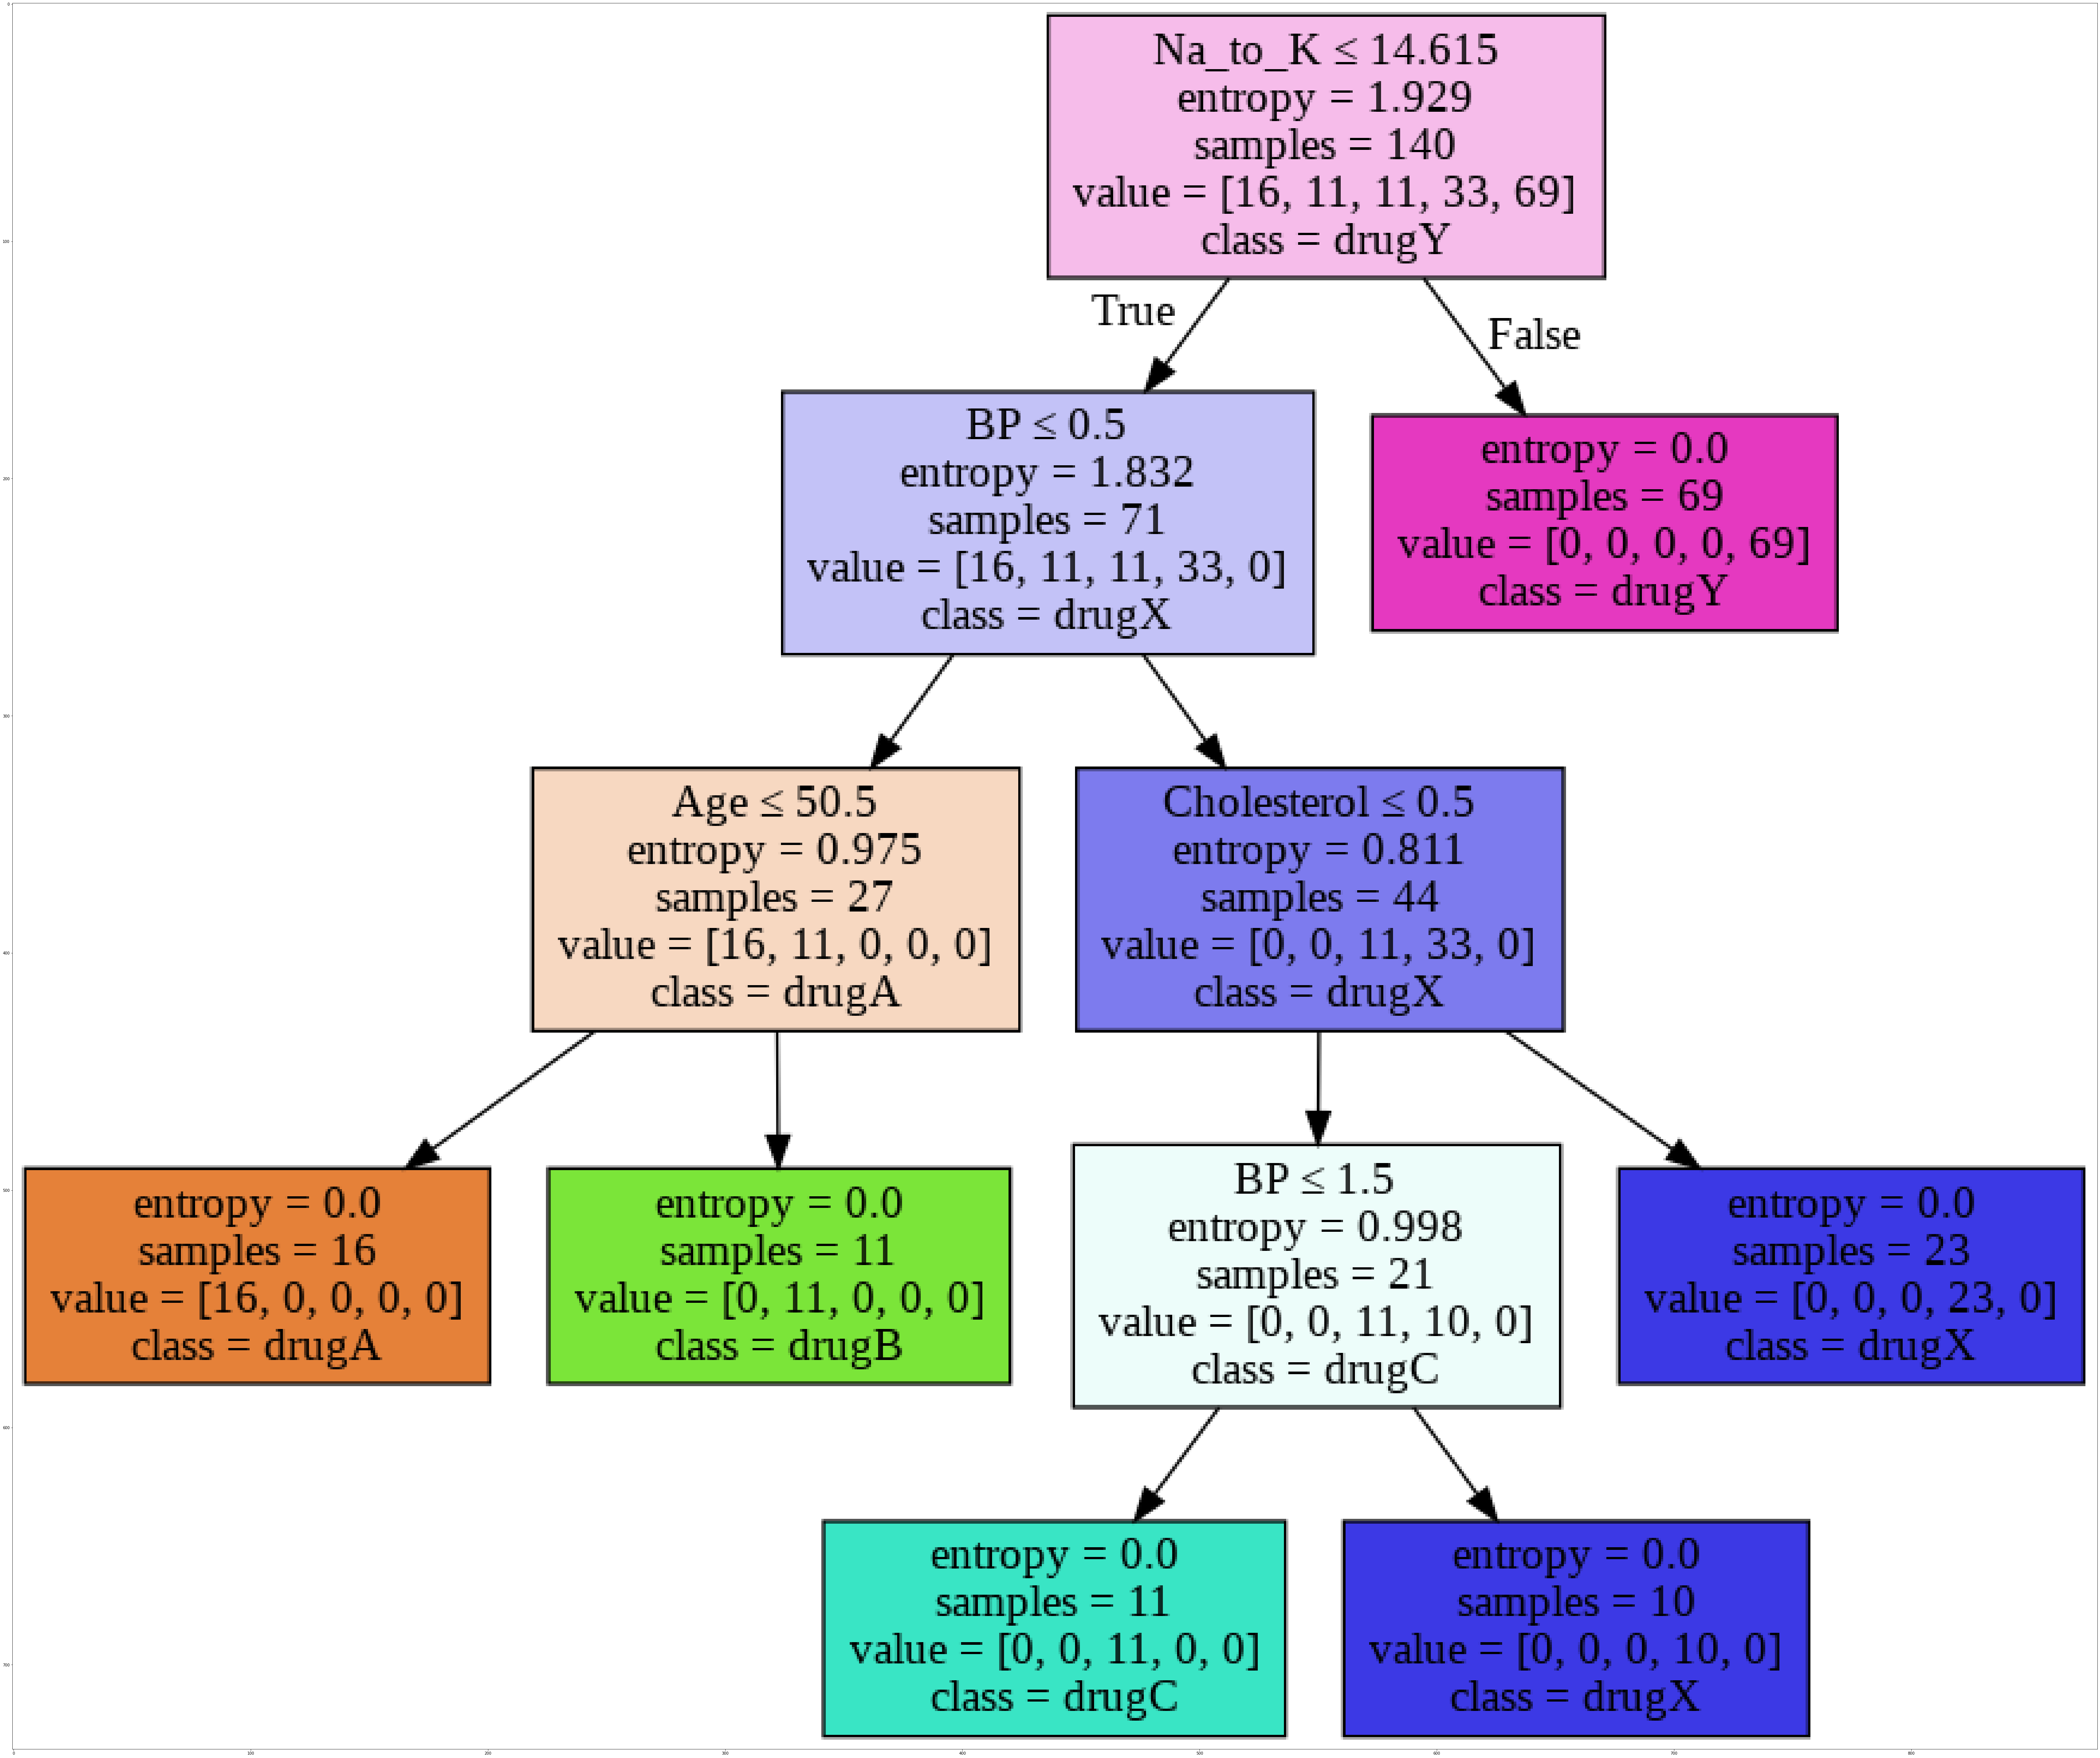

In [31]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]#features
targetNames = my_data["Drug"].unique().tolist()#should be unique identity & to be listed in the list 
#now making viz-graph ,which is used for the desecion tree visualisation plot ,where we can see the modelled decision tree on the basis of the dataset
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False) 
   #features_names,drugtree(DescionTreeclasifier's instance),out_file(dot_data with the help of stringIO),class_names(as y_trainset)....this all supplied above in graphviz 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')